In [84]:
# Importar librerías Generales
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Haga una exploración rápida de sus datos, para eso haga un resumen de su conjunto de datos.

In [85]:
# Lectura de datos
df = pd.read_csv('movies.csv')

In [86]:
# pre procesamiento de datos en el dataframe
df['id'] = df['id'].astype(str)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['genres'] = df['genres'].str.split('|')
df['homePage'] = df['homePage'].astype(str)
df['productionCompany'] = df['productionCompany'].str.split('|')
df['productionCompanyCountry'] = df['productionCompanyCountry'].str.split('|')
df['productionCountry'] = df['productionCountry'].str.split('|')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['video'] = df['video'].astype(bool)
df['director'] = df['director'].str.split('|')
df['actors'] = df['actors'].str.split('|')
df['actorsPopularity'] = df['actorsPopularity'].str.split('|')
df['actorsCharacter'] = df['actorsCharacter'].str.split('|')
df['originalTitle'] = df['originalTitle'].astype(str)
df['title'] = df['title'].astype(str)
df['originalLanguage'] = df['originalLanguage'].astype(str)
df['popularity'] = pd.to_numeric(df['budget'], errors='coerce')
df['releaseDate'] = df['releaseDate'].astype(str)
df['voteAvg'] = pd.to_numeric(df['voteAvg'], errors='coerce')
df['voteCount'] = pd.to_numeric(df['voteCount'], errors='coerce')
df['genresAmount'] = pd.to_numeric(df['genresAmount'], errors='coerce')
df['productionCoAmount'] = pd.to_numeric(df['productionCoAmount'], errors='coerce')
df['productionCountriesAmount'] = pd.to_numeric(df['productionCountriesAmount'], errors='coerce')
df['actorsAmount'] = pd.to_numeric(df['actorsAmount'], errors='coerce')
df['castWomenAmount'] = pd.to_numeric(df['castWomenAmount'], errors='coerce')
df['castMenAmount'] = pd.to_numeric(df['castMenAmount'], errors='coerce')

*Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta)*

In [87]:
def asign(x):
    switch = {
        1: 'cualitativa nominal',
        2: 'cualitativa ordinal',
        3: 'cuantitativa continua',
        4: 'cuantitativa discreta'
    }
    return switch.get(x, 'Unknown')

tipo_var = [
    1, 3, 1, 1, 1, 1, 1, 3, 3, 4, 2, 1, 3, 1, 1, 1, 1, 3, 1, 3, 4, 4, 4, 4, 4, 4, 4
]



## (5 puntos) Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta)

In [88]:
table = pd.DataFrame({
    'index of the column': [i for i, _ in enumerate(df.columns)],
    'type of the first non-null element of the column': df.apply(lambda x: type(x.dropna().iloc[0]) if x.dropna().size else None),
    'number of NaN values in the column': df.isna().sum()
})

# add a COLUMN to the dataframe table and assign the type of variable using the function asign
table['type of variable'] = [asign(x) for x in tipo_var]

# Print the table
table.head(100)

,index of the column,type of the first non-null element of the column,number of NaN values in the column,type of variable
id,0,<class 'str'>,0,cualitativa nominal
budget,1,<class 'numpy.float64'>,1,cuantitativa continua
genres,2,<class 'list'>,53,cualitativa nominal
homePage,3,<class 'str'>,0,cualitativa nominal
productionCompany,4,<class 'list'>,457,cualitativa nominal
productionCompanyCountry,5,<class 'list'>,1280,cualitativa nominal
productionCountry,6,<class 'list'>,233,cualitativa nominal
revenue,7,<class 'numpy.int64'>,0,cuantitativa continua
runtime,8,<class 'numpy.int64'>,0,cuantitativa continua
video,9,<class 'numpy.bool_'>,0,cuantitativa discreta


## Investigue si las variables cuantitativas siguen una distribución normal y haga una tabla de frecuencias de las variables cualitativas. Explique todos los resultados. 

In [107]:
# Lista para almacenar los índices de las filas eliminadas
rows_eliminated = []

# Tamaño original del DataFrame
original_size = df.shape[0]

# iterar sobre las columnas clasificadas como cuantitativas. 
var_cuantitativas = table[table['type of variable'].isin(['cuantitativa continua', 'cuantitativa discreta'])]
var_cuantitativas


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
7448,448361,0.0,NaN,nan,NaN,NaN,NaN,0,6,True,...,0.0,2011-09-13,7.0,1.0,0.0,0.0,0.0,448361.0,NaN,NaN


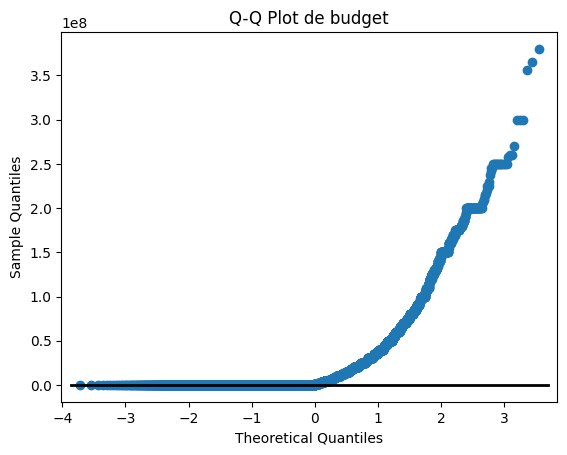

ValueError: could not convert string to float: 'Peter Piper'

In [90]:
def visualizar_distribucion_normal(var):
    # Crear el gráfico Q-Q
    sm.qqplot(var, line='s')
    plt.title(f'Q-Q Plot de {var.name}')

    # Agregar la curva de distribución normal
    mu, std = var.mean(), var.std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.show()


def visualizar_distribucion_normal_lista(lista):
    # Filtrar elementos que no son listas
    lista_no_vacia = [x for x in lista if isinstance(x, list) and len(x) > 0]

    # Verificar si hay listas válidas
    if not lista_no_vacia:
        print("No hay datos válidos para visualizar.")
        return

    # Convertir a un tipo de dato numérico antes de concatenar
    concatenated_data = np.concatenate([np.asarray(x, dtype=np.float64) for x in lista_no_vacia])

    # Crear el gráfico Q-Q
    sm.qqplot(concatenated_data, line='s')
    plt.title(f'Q-Q Plot de {lista.name}')

    # Agregar la curva de distribución normal
    mu, std = np.mean(concatenated_data), np.std(concatenated_data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.show()

# Uso de la función
visualizar_distribucion_normal(df['budget'])
visualizar_distribucion_normal_lista(df['actorsPopularity'])


El dataset obtenido de 'movies.csv' presenta información sobre 1000 películas diferentes. Presenta 27 variables (columnas) de tipo y rango variado. 

In [ ]:
df['genres'].head(10)

0                                        Crime, Comedy
1                              Action, Thriller, Crime
2                   Adventure, Action, Science Fiction
3                                    Animation, Family
4                               Comedy, Drama, Romance
5                                                Drama
6                                       Mystery, Drama
7                                         Drama, Crime
8    Adventure, Fantasy, Action, Thriller, Science ...
9                               Drama, Science Fiction
Name: genres, dtype: object

In [ ]:
# Aplanamos las listas en la columna 'genres'
df['genres'] = df['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Creamos la tabla de frecuencias
pd.crosstab(index=df['genres'], columns='count')

col_0,count
genres,
Action,112
"Action, Adventure",21
"Action, Adventure, Animation",4
"Action, Adventure, Animation, Comedy, Family",3
"Action, Adventure, Animation, Comedy, TV Movie",1
...,...
"Western, Drama, Mystery",1
"Western, Horror",1
"Western, Mystery, Thriller, Drama",1


In [ ]:
# Expandimos las listas en la columna 'productionCompany'
df['productionCompany'] = df['productionCompany'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x).split(',')

# Creamos la tabla de frecuencias
pd.crosstab(index=df['productionCompany'], columns='count')

AttributeError: 'Series' object has no attribute 'split'

In [ ]:
pd.crosstab(index=df['originalLanguage'], columns='count').sort_values(by='count', ascending=False)

col_0,count
originalLanguage,
en,7771
ja,644
es,425
fr,271
ko,167
zh,119
it,100
de,84
cn,80


In [ ]:
pd.crosstab(index=df['releaseDateseDate'], columns='count').sort_values(by='count', ascending=False)title

col_0,count
releaseDate,
2021-02-12,15
2021-10-08,15
2021-10-01,14
2021-11-12,12
2021-06-11,11
...,...
2011-10-20,1
2011-10-24,1
2011-10-28,1


In [ ]:
pd.crosstab(index=df['title'], columns='count').sort_values(by='count', ascending=False)


col_0,count
title,
Cinderella,4
Pinocchio,4
Awake,3
Great Expectations,3
Beauty and the Beast,3
...,...
Gulliver's Travels,1
Gully,1
Gun Shy,1


In [ ]:
pd.crosstab(index=df['originalTitle'], columns='count').sort_values(by='count', ascending=False)


col_0,count
originalTitle,
Pinocchio,4
Alice in Wonderland,3
Halloween,3
The Courier,3
Les Misérables,3
...,...
Eden Lake,1
Edge of Darkness,1
Edge of Fear,1


In [94]:
df[['title', 'budget']].head(10).sort_values(by='budget', ascending=False)


,title,budget
3,Finding Nemo,94000000.0
8,The Fifth Element,90000000.0
4,Forrest Gump,55000000.0
1,Judgment Night,21000000.0
5,American Beauty,15000000.0
7,Dancer in the Dark,12800000.0
2,Star Wars,11000000.0
0,Four Rooms,4000000.0
9,Metropolis,1300000.0
6,Citizen Kane,839727.0


In [95]:
df[['title', 'revenue']].head(10).sort_values(by='revenue', ascending=False)

,title,revenue
3,Finding Nemo,940335536
2,Star Wars,775398007
4,Forrest Gump,677387716
5,American Beauty,356296601
8,The Fifth Element,263920180
7,Dancer in the Dark,40031879
6,Citizen Kane,23218000
1,Judgment Night,12136938
0,Four Rooms,4257354
9,Metropolis,650422


In [98]:
df[['title', 'voteCount']].head(10).sort_values(by='voteCount', ascending=False)

,title,voteCount
7448,Thor: Hammer Time,1.0
